# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-02 21:24:04--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-04-02 21:24:05 (28.8 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Social_Network_Ads.csv')


In [9]:
# Mostrar las primeras filas

print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# Información general del dataset
print("Descripción estadística:")
display(df.describe())

Descripción estadística:


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

User ID: No relevante, solo un identificador único.

Gender: Relevante, puede influir en los hábitos de compra.

Age: Relevante, afecta las decisiones de compra.

EstimatedSalary: Muy relevante, determina la capacidad de compra.

Purchased: Variable objetivo, esencial para la predicción.

## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

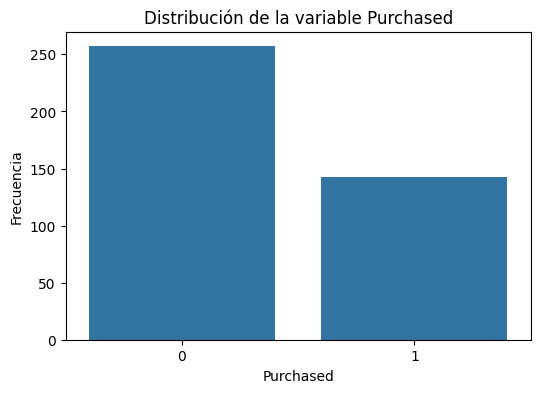

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df)
plt.title('Distribución de la variable Purchased')
plt.xlabel('Purchased')
plt.ylabel('Frecuencia')
plt.show()

No se encuentra balanceada

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

Si la variable Purchased está desbalanceada, el modelo podría predecir mayormente la clase mayoritaria, afectando la precisión y el recall de la clase minoritaria. Para mitigar esto, se pueden usar técnicas como SMOTE para equilibrar las clases, submuestreo o sobremuestreo, o ajustar el umbral de decisión del modelo.

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

son relevantes porque influyen en el comportamiento de compra, la edad determina las preferencias de producto, mientras que el salario refleja la capacidad adquisitica para realizar las compras

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

La estratificación asegura que las proporciones de clases en los conjuntos de entrenamiento y prueba sean similares a las del
original, evitando sesgos y mejora la capacidad del modelo para generalizar y evaluar de manera más precisa.

## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

Puede resultar muy complejo porque el árbol puede crecer demasiado, adaptándose a cada detalle del conjunto de entrenamiento. Esto aumenta el riesgo de overfitting, donde el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad para generalizar a nuevos datos

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

Proporciona información detallada sobre los errores del modelo al mostrar los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos. Permitiendo identificar qué tipo de error ocurre con mayor frecuencia y ajustar el modelo con base en eso

## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

Muestra el rendimiento del modelo en diferentes umbrales de clasificación, graficando la tasa de verdaderos positivos frente a la tasa de falsos positivos. Un AUC alto indica que el modelo tiene una excelente capacidad para discriminar entre las clases, tiene un buen rendimiento general. Por otro lado, un AUC bajo sugiere que el modelo no es mejor que una clasificación aleatoria, lo que indica un bajo rendimiento

## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

La regla de decisión en el primer nodo determina cómo se divide el conjunto de datos, por ejemplo, "Age <= 35" o "EstimatedSalary > 50,000", basándose en la característica más relevante para clasificar.

Las ramas representan comparaciones entre valores de Age o EstimatedSalary, mientras que las hojas muestran el resultado final de la clasificación si se realizó la compra o no en un caso

La profundidad excesiva y los nodos terminales pequeños pueden generar un modelo que se ajusta demasiado a los datos de entrenamiento, perdiendo capacidad de generalización.

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

 Si el modelo muestra un alto rendimiento en el conjunto de entrenamiento pero un rendimiento malo en la prueba, eso indica que el modelo está sobreajustado viendo la exactitud o el F1-score, son mucho más altas en el conjunto de entrenamiento que en el conjunto de prueba.
 Se pueden usar validación cruzada, limitar la profundidad del árbol y aplicar regularización para evitar que el modelo se ajuste demasiado a los datos de entrenamiento y mejorar su capacidad de generalización



## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

 Limitar la profundidad del árbol generalmente lleva a una reducción en el rendimiento en el conjunto de entrenamiento, ya que el modelo se vuelve menos complejo y no puede capturar todos los detalles del dataset pero esto mejora el rendimiento en el conjunto de prueba, ya que se reduce el riesgo de sobreajuste

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

El modelo ajustado con profundidad limitada tiene un mejor balance, ya que es más simple y fácil de interpretar, evitando la complejidad excesiva del modelo sin restricciones.
El modelo ajustado muestra un rendimiento más equilibrado entre los conjuntos de entrenamiento y prueba, lo que indica que generaliza mejor y está menos afectado por el sobreajuste.
Modelos como regresión logística y SVM podrían utilizarse como referencia para evaluar el desempeño, ya que son más simples y menos propensos al sobreajuste en comparación con los árboles de decisión complejos.